# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Rivaldo
- Email: rivaldolie@gmail.com
- Id Dicoding: https://www.dicoding.com/users/rivaldo_rwzv

## Menentukan Pertanyaan Bisnis

- Berapa besar pengaruh cuaca terhadap jumlah peminjam sepeda dari tahun 2011 hingga 2012?
- Bagaimana tren rental sepeda berdasarkan hari dan jam dari tahun 2011 hingga 2012?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
# Import data (menggunakan bike-sharing-dataset)
day = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Bike-sharing-dataset/day.csv", parse_dates=["dteday"])
hour = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Bike-sharing-dataset/hour.csv", parse_dates=["dteday"])

### Assessing Data

In [3]:
# Pemeriksaan tipe data
day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [4]:
# Pemeriksaan jumlah data null
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Pemeriksaan jumlah data null
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Pemeriksaan apakah ada anomali data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# Pemeriksaan apakah ada anomali data
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [8]:
# Membersihkan data kolom "season" agar lebih mudah dipahami
day["season"].replace([1, 2, 3, 4], ["Spring", "Summer", "Fall", "Winter"], inplace=True)
hour["season"].replace([1, 2, 3, 4], ["Spring", "Summer", "Fall", "Winter"], inplace=True)

In [9]:
# Membersihkan data kolom "weathersit" agar lebih mudah dipahami
day["weathersit"].replace([1, 2, 3], ["Clear", "Mist", "Rain"], inplace=True)
hour["weathersit"].replace([1, 2, 3], ["Clear", "Mist", "Rain"], inplace=True)

In [10]:
# Membersihkan data kolom "yr" agar lebih mudah dipahami
day["yr"].replace([0, 1], [2011, 2012], inplace=True)
hour["yr"].replace([0, 1], [2011, 2012], inplace=True)

In [11]:
# Membersihkan data kolom "weekday" agar lebih mudah dipahami
day["weekday"].replace([1, 2, 3, 4, 5, 6, 0], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], inplace=True)
hour["weekday"].replace([1, 2, 3, 4, 5, 6, 0], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], inplace=True)

In [12]:
# Merubah nama kolom agar lebih mudah dipahami
day.rename(columns={"cnt":"total_count"}, inplace=True)
hour.rename(columns={"cnt":"total_count"}, inplace=True)

In [13]:
# Menghapus kolom yang tidak digunakan
day.drop(columns=["instant","temp","atemp","hum","windspeed"], inplace=True)
hour.drop(columns=["instant","temp","atemp","hum","windspeed"], inplace=True)

## Exploratory Data Analysis (EDA)

### Explore #1:  Berapa besar pengaruh cuaca terhadap jumlah peminjam sepeda dari tahun 2011 hingga 2012?

In [14]:
# Grouping data berdasarkan cuaca
daily_weather = day.groupby("weathersit")["total_count"].mean()

# Menghitung persentase penurunan peminjam sepeda terhadap cuaca
clear_mist_percentage = str(round(-(daily_weather["Clear"]-daily_weather["Mist"])/daily_weather["Clear"]*100))+"%"
clear_rain_percentage = str(round(-(daily_weather["Clear"]-daily_weather["Rain"])/daily_weather["Clear"]*100))+"%"
percentage = ["0%", clear_mist_percentage, clear_rain_percentage]

### Explore #2:  Bagaimana tren rental sepeda berdasarkan hari dan jam dari tahun 2011 hingga 2012?

In [15]:
# Grouping data berdasarkan waktu dan hari. Reindex agar hari bisa urut
new_cols = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hourly = hour.groupby(["hr","weekday"])["total_count"].mean().unstack().reindex(columns=new_cols)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa besar pengaruh cuaca terhadap jumlah peminjam sepeda dari tahun 2011 hingga 2012?

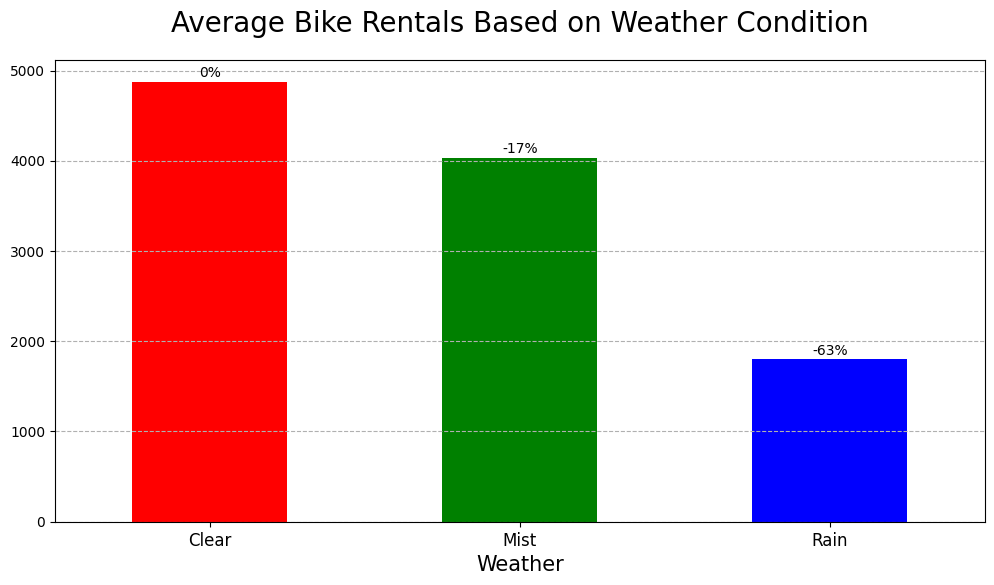

In [16]:
# Plotting EDA Explore #1 menggunakan bar chart
daily_weather.plot(kind="bar",
                   color=["r","g","b"],
                   figsize=(12,6))
plt.title("Average Bike Rentals Based on Weather Condition", size=20, pad=20)
plt.xlabel("Weather", size=15)
plt.xticks(rotation=0, size=12)
plt.grid(visible=True, axis="y", linestyle="--")

# Looping untuk pemberian teks pada bar chart
for x, y, p in zip(np.arange(len(daily_weather)), daily_weather[np.arange(len(daily_weather))]+50, percentage):
  plt.text(x, y, p, ha="center")

plt.show()

### Pertanyaan 2: Bagaimana tren rental sepeda berdasarkan hari dan jam dari tahun 2011 hingga 2012?

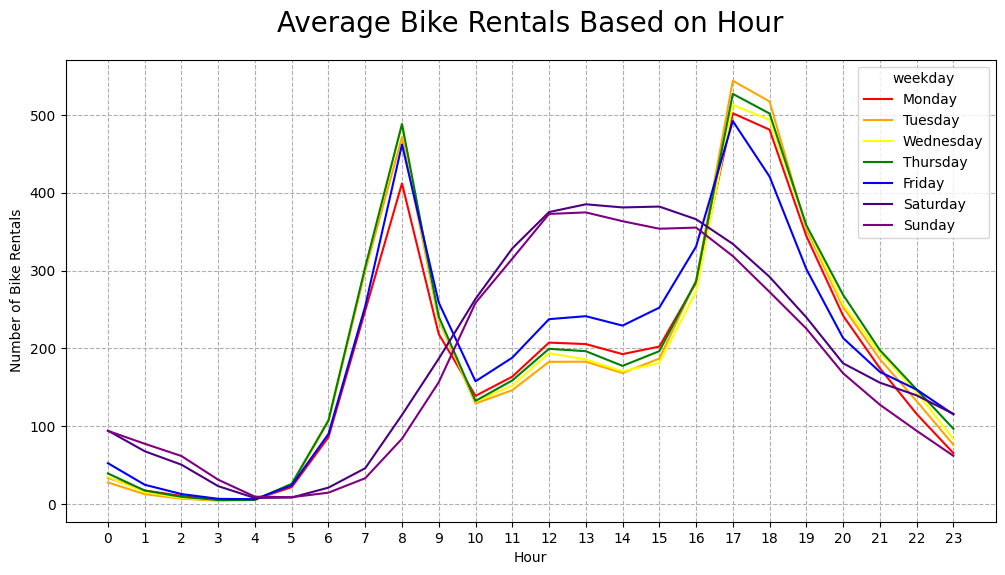

In [17]:
# Plotting EDA Explore #2 menggunakan line chart
hourly.plot(color=["red","orange","yellow","green","blue","indigo","purple"],
            figsize=(12,6))
plt.title("Average Bike Rentals Based on Hour", size=20, pad=20)
plt.xlabel("Hour")
plt.ylabel("Number of Bike Rentals")
plt.xticks(np.arange(len(hourly)))
plt.grid(visible=True, linestyle="--")
plt.show()

## Conclusion

###- Conclusion pertanyaan 1: Berapa besar pengaruh cuaca terhadap jumlah peminjam sepeda dari tahun 2011 hingga 2012?
Pada grafik tersebut bahwa cuaca mempengaruhi jumlah peminjam sepeda secara signifikan. Di cuaca yang cerah, rata-rata peminjam sepeda lebih tinggi daripada cuaca berkabut maupun hujan. Rata-rata peminjam sepeda di cuaca berkabut turun 17% dibandingkan dengan cuaca cerah, sedangkan peminjam sepeda di cuaca hujan turun 63% dibandingkan dengan cuaca cerah. Sehingga, disarankan agar suplai sepeda selalu siap di cuaca cerah. Apabila ingin melakukan perawatan sepeda dalam jumlah besar, maka bisa dilakukan ketika musim hujan.

###- Conclusion pertanyaan 2: Bagaimana tren rental sepeda berdasarkan hari dan jam dari tahun 2011 hingga 2012?
Grafik ini menunjukkan rata-rata peminjam sepeda berdasarkan hari dan jam.
Pada grafik tersebut dapat disimpulkan bahwa rata-rata peminjam sepeda di hari kerja banyak terjadi pada jam 8 pagi dan jam 5 sore. Hal ini kemungkinan disebabkan karena pekerja berangkat kerja dan pulang kerja menggunakan sepeda.Untuk di hari libur, justru banyak peminjam pada siang hari (jam 12 hingga 3 siang). Sehingga, disarankan menyediakan suplai sepeda yang lebih banyak di jam-jam ramai dan melakukan perawatan sepeda pada jam-jam sepi agar optimal.

In [18]:
# Export dataframe yang sudah dibersihkan untuk pengerjaan streamlit
day.to_csv("cleaned_day.csv", index=False)

In [19]:
# Export dataframe yang sudah dibersihkan untuk pengerjaan streamlit
hour.to_csv("cleaned_hour.csv", index=False)